In [134]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
from pandas import json_normalize
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import time
import argparse
import logging
from random import randint
from time import sleep
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.neighbors import KNeighborsClassifier

In [135]:
dataa = pd.read_csv('dff1.csv')
datab = pd.read_csv('dff2.csv')
datac = pd.read_csv('dff3.csv')

In [136]:
data = pd.concat([dataa, datab, datac], axis=0).reset_index(drop=True)

In [137]:
data = data.drop(["Unnamed: 0","Length"],axis=1)

In [138]:
data

,Song Uri,Song,Artist Uri,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_signature,Duration_ms
0,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),spotify:artist:2wIVse2owClT7go1WT98tk,Missy Elliott,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4,226864
1,6I9VzXrHxO9rA9A5euc8Ak,Toxic,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,0.774,0.838,5,-3.914,0,0.1140,0.024900,0.025000,0.2420,0.924,143.040,4,198800
2,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Beyoncé,0.664,0.758,2,-6.583,0,0.2100,0.002380,0.000000,0.0598,0.701,99.259,4,235933
3,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,spotify:artist:31TPClRtHm23RisEBtV3X7,Justin Timberlake,0.892,0.714,4,-6.055,0,0.1410,0.201000,0.000234,0.0521,0.817,100.972,4,267267
4,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,spotify:artist:5EvFsr3kj42KNv97ZEnqij,Shaggy,0.853,0.606,0,-4.596,1,0.0713,0.056100,0.000000,0.3130,0.654,94.759,4,227600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2EvwLVrnYbCZEG6Kx5DCRy,Piece of Me,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,0.769,0.638,11,-5.054,1,0.2160,0.090200,0.000000,0.0857,0.782,115.007,4,212107
29996,2Pvw7sZ7cTFMihs9RxNYvD,Click Click Boom,spotify:artist:5S6hjAxgxjsLylsTtMIimO,Saliva,0.609,0.935,6,-2.941,1,0.0479,0.002900,0.000359,0.1880,0.498,95.957,4,252400
29997,2HerxRQish8VLHvu20oxz2,Always,spotify:artist:5S6hjAxgxjsLylsTtMIimO,Saliva,0.363,0.906,1,-4.415,1,0.0615,0.012200,0.000000,0.1720,0.370,181.964,4,231200
29998,7qc9PaK7JeTgMkLwaXgW0q,Had Enough,spotify:artist:5BtHciL0e0zOP7prIHn3pP,Breaking Benjamin,0.308,0.948,0,-2.771,0,0.0772,0.000010,0.000022,0.1050,0.229,163.938,4,228213


In [139]:
X = data[['Danceability','Energy','Key','Loudness','Mode','Speechiness','Acousticness','Instrumentalness','Liveness','Valence','Tempo','Time_signature','Duration_ms']]

In [140]:
scaler = StandardScaler()
X_prep = scaler.fit_transform(X)

In [141]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=22, random_state=13)
kmeans.fit(X_prep)

KMeans(n_clusters=22, random_state=13)

In [124]:
def features_ferr(z):
    danceability_ = []
    energy_ = []
    key_ = []
    loudness_ = []
    mode_ = []
    speechiness_ =[]
    acousticness_ = []
    instrumentalness_ = []
    liveness_ = []
    valence_ = []
    tempo_ = []
    time_signature_ = []
    duration_ms_ = []
    
    x = sp.audio_features(z)[0]
    danceability_.append(x['danceability'])
    energy_.append(x['energy'])
    key_.append(x['key'])
    loudness_.append(x['loudness'])
    mode_.append(x['mode'])
    speechiness_.append(x['speechiness'])
    acousticness_.append(x['acousticness'])
    instrumentalness_.append(x['instrumentalness'])
    liveness_.append(x['liveness'])
    valence_.append(x['valence'])
    tempo_.append(x['tempo'])
    time_signature_.append(x['time_signature'])
    duration_ms_.append(x['duration_ms'])
    
    song_feat = pd.DataFrame({"Danceability":danceability_, "Energy":energy_,"Key":key_, \
                              "Loudness":loudness_,"Mode":mode_, "Speechiness": speechiness_, \
                              "Acousticness":acousticness_, "Instrumentalness":instrumentalness_,\
                              "Liveness":liveness_, "Valence": valence_, "Tempo":tempo_, \
                              "Time_signature":time_signature_, "Duration_ms":duration_ms_})
    return song_feat

In [129]:
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="dc671f42650246cfb5d4bfc2f2cdb178",
                                                           client_secret="2609e5432ee94c1392ed030412613d87"))
sony = features_ferr('2bPPPPIxNwCtmrdzEjhEbe')
y = sony

In [144]:
clusters = kmeans.predict(X_prep)

In [148]:
data['clusters'] = clusters

array([18, 18, 15, ..., 21, 17, 12], dtype=int32)

In [149]:
pd.Series(clusters).value_counts()

4     2440
19    2128
18    2087
12    2047
3     1796
14    1785
15    1774
17    1723
21    1572
13    1559
2     1515
9     1369
7     1325
5     1316
11    1155
8     1083
0     1006
20     799
1      704
10     422
6      210
16     185
dtype: int64

In [150]:
kmeans.inertia_ 

175423.2766967217

In [151]:
%%time
kmeans = KMeans(n_clusters=22,
                init="random",
                n_init=100,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=10,
                tol=0,
                random_state=13)
kmeans.fit(X_prep)
print(kmeans.inertia_)

176620.3225139041
CPU times: user 8.67 s, sys: 838 ms, total: 9.51 s
Wall time: 1.74 s


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

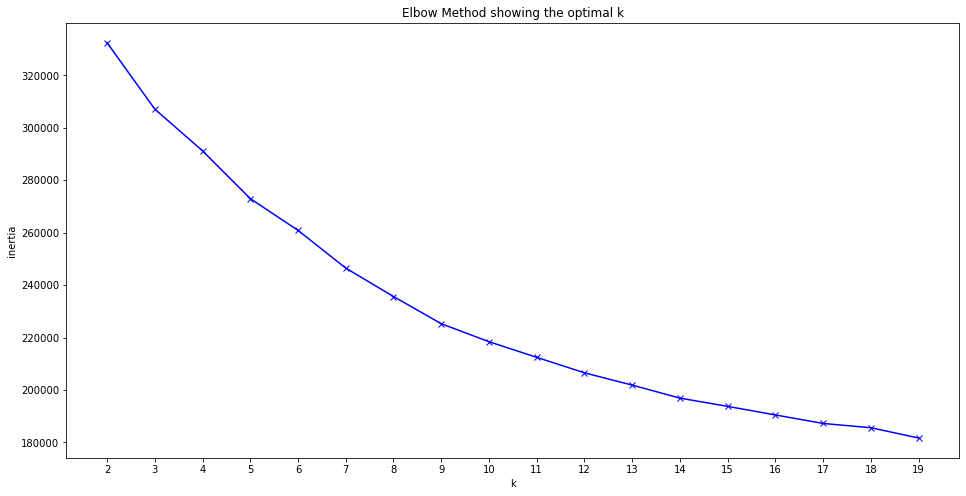

In [153]:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=13)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

100%|██████████████████████████████████████████| 5/5 [00:58<00:00, 11.61s/it]


Text(0.5, 1.0, 'Slhouette score showing the optimal k')

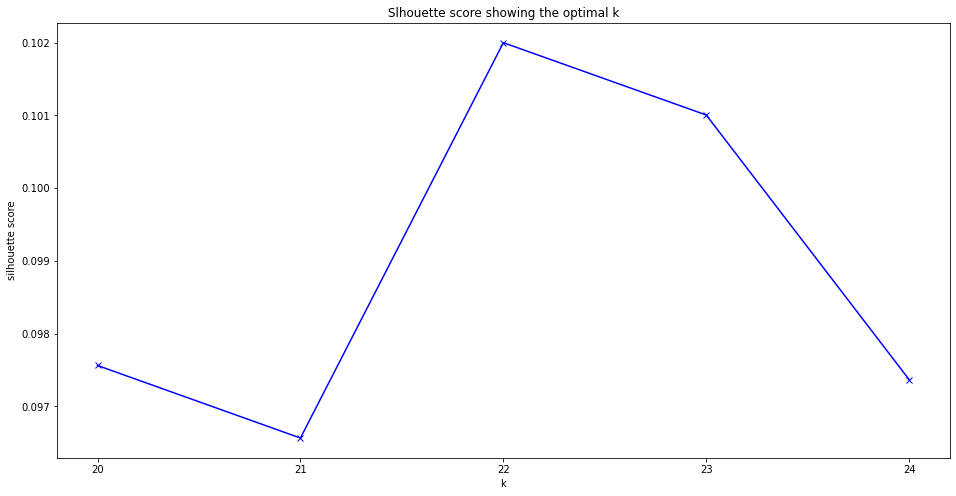

In [109]:
# high silhouette
from sklearn.metrics import silhouette_score
K = range(20, 25)
silhouette = []

for k in tqdm(K):
    kmeans = KMeans(n_clusters=k,
                    random_state=13)
    kmeans.fit(X_prep)
    silhouette.append(silhouette_score(X_prep, kmeans.predict(X_prep)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Slhouette score showing the optimal k')

In [110]:
from sklearn.decomposition import PCA

In [111]:
pca = PCA()
pca.fit(X_prep)

PCA()

In [112]:
pca.explained_variance_ratio_[:4]

array([0.22125266, 0.11318374, 0.0906577 , 0.08536452])

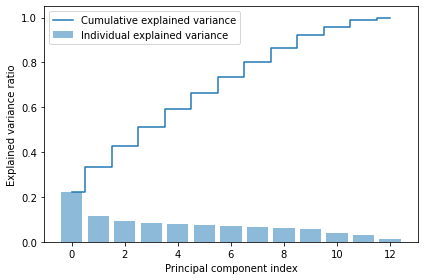

In [113]:
import numpy as np
exp_var_pca = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#cum_sum_eigenvalues

# Create the visualization plot
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, 
        alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, 
         where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [53]:
pca.explained_variance_ratio_[:10].sum()

0.9213609765763229

In [54]:
pca = PCA(10)
pca.fit(X_prep)

PCA(n_components=10)

In [55]:
pca.explained_variance_ratio_.sum()

0.921360976576323

In [72]:
X_pca = pca.transform(X_prep)

In [73]:
knn = KNeighborsClassifier()
knn.fit(X_pca)

TypeError: fit() missing 1 required positional argument: 'y'

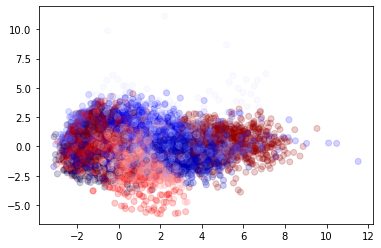

In [119]:
plt.scatter(X_pca[:,0],X_pca[:,1],cmap='seismic', c=clusters,alpha=0.2)

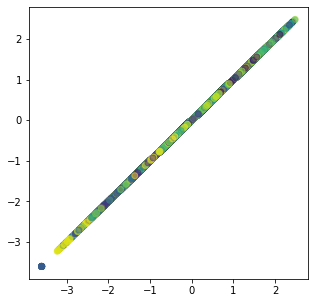

0 0


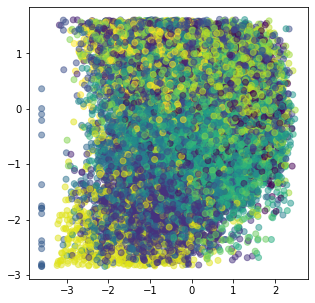

0 1


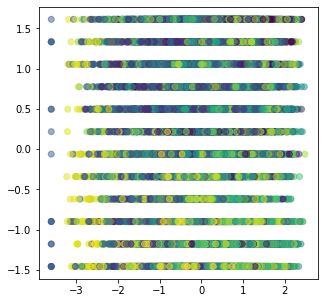

0 2


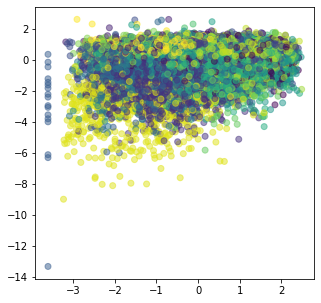

0 3


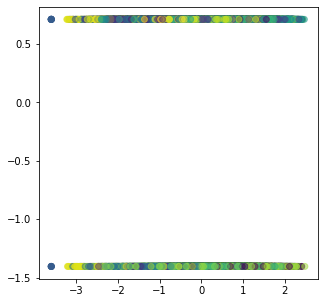

0 4


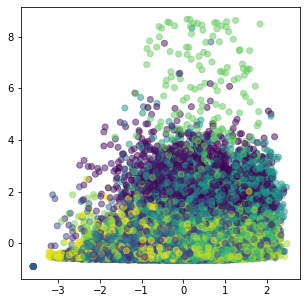

0 5


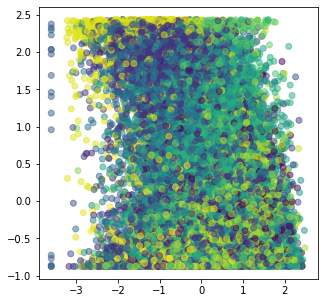

0 6


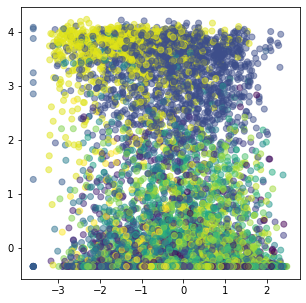

0 7


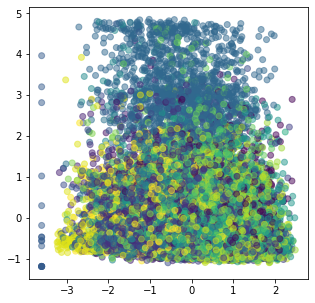

0 8


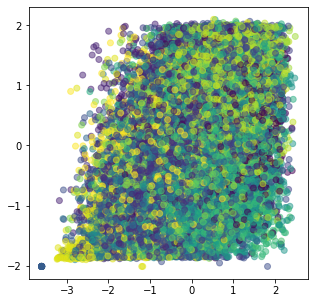

0 9


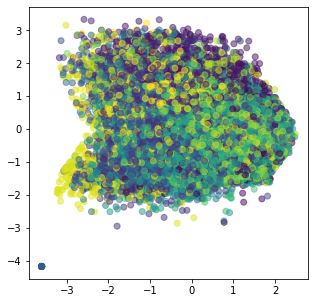

0 10


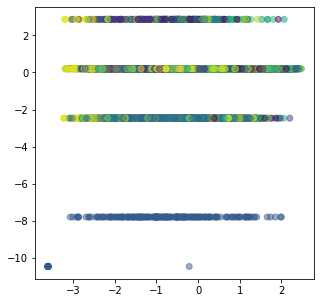

0 11


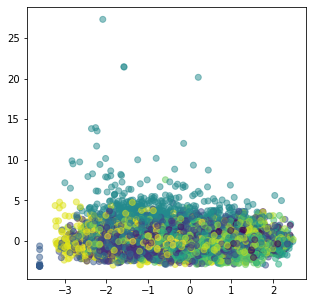

0 12


IndexError: index 13 is out of bounds for axis 1 with size 13

<Figure size 360x360 with 0 Axes>

In [120]:
for x in range(22):
    for y in range(22):
        plt.figure(figsize=(5, 5))
        plt.scatter(X_prep[:, x], X_prep[:, y],  c= clusters, alpha=0.5)
        plt.show()
        print(x,y)

In [60]:
import seaborn as sb

Text(0.5, 1.0, 'Correlation of PC scores')

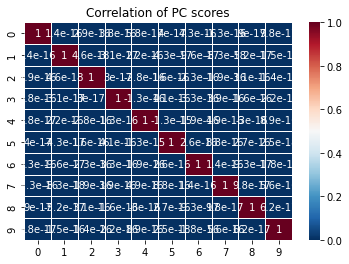

In [62]:
X_pca = pca.transform(X_prep)
corr_pc = pd.DataFrame(X_train_pca).corr()
sb.heatmap(corr_pc, 
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)
plt.title('Correlation of PC scores')

Text(0.5, 1.0, 'Correlation of in original data')

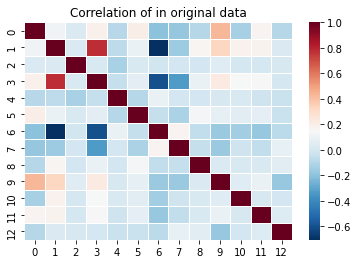

In [63]:
corr = pd.DataFrame(X_prep).corr()
sb.heatmap(corr, 
            cmap='RdBu_r',
            annot=False,
            linewidth=0.5)
plt.title('Correlation of in original data')

/var/folders/1_/tj8gsc8n4r3fnt406bzys4s40000gn/T/ipykernel_70051/1600554145.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


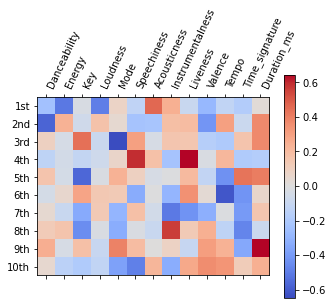

In [66]:
plt.matshow(pca.components_[0:], cmap='coolwarm')
plt.yticks([0,1,2,3,4,5,6,7,8,9],['1st','2nd','3rd','4th','5th','6th','7th','8th','9th','10th'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.show()# 

In [121]:
data['cluster'] = clusters

In [122]:
data

,Song Uri,Song,Artist Uri,Artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Time_signature,Duration_ms,cluster
0,0UaMYEvWZi0ZqiDOoHU3YI,Lose Control (feat. Ciara & Fat Man Scoop),spotify:artist:2wIVse2owClT7go1WT98tk,Missy Elliott,0.904,0.813,4,-7.105,0,0.1210,0.031100,0.006970,0.0471,0.810,125.461,4,226864,18
1,6I9VzXrHxO9rA9A5euc8Ak,Toxic,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,0.774,0.838,5,-3.914,0,0.1140,0.024900,0.025000,0.2420,0.924,143.040,4,198800,18
2,0WqIKmW4BTrj3eJFmnCKMv,Crazy In Love,spotify:artist:6vWDO969PvNqNYHIOW5v0m,Beyoncé,0.664,0.758,2,-6.583,0,0.2100,0.002380,0.000000,0.0598,0.701,99.259,4,235933,15
3,1AWQoqb9bSvzTjaLralEkT,Rock Your Body,spotify:artist:31TPClRtHm23RisEBtV3X7,Justin Timberlake,0.892,0.714,4,-6.055,0,0.1410,0.201000,0.000234,0.0521,0.817,100.972,4,267267,18
4,1lzr43nnXAijIGYnCT8M8H,It Wasn't Me,spotify:artist:5EvFsr3kj42KNv97ZEnqij,Shaggy,0.853,0.606,0,-4.596,1,0.0713,0.056100,0.000000,0.3130,0.654,94.759,4,227600,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2EvwLVrnYbCZEG6Kx5DCRy,Piece of Me,spotify:artist:26dSoYclwsYLMAKD3tpOr4,Britney Spears,0.769,0.638,11,-5.054,1,0.2160,0.090200,0.000000,0.0857,0.782,115.007,4,212107,4
29996,2Pvw7sZ7cTFMihs9RxNYvD,Click Click Boom,spotify:artist:5S6hjAxgxjsLylsTtMIimO,Saliva,0.609,0.935,6,-2.941,1,0.0479,0.002900,0.000359,0.1880,0.498,95.957,4,252400,4
29997,2HerxRQish8VLHvu20oxz2,Always,spotify:artist:5S6hjAxgxjsLylsTtMIimO,Saliva,0.363,0.906,1,-4.415,1,0.0615,0.012200,0.000000,0.1720,0.370,181.964,4,231200,21
29998,7qc9PaK7JeTgMkLwaXgW0q,Had Enough,spotify:artist:5BtHciL0e0zOP7prIHn3pP,Breaking Benjamin,0.308,0.948,0,-2.771,0,0.0772,0.000010,0.000022,0.1050,0.229,163.938,4,228213,17


In [123]:
data.to_csv('final_final.csv')